In [5]:
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import contractions 
from matplotlib import pyplot as pyt
import seaborn as sns
import emoji
from re import sub
from langdetect import detect
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer
from wordcloud import STOPWORDS
from wordcloud import WordCloud

In [2]:
df=pd.read_csv("sentimentdataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       712 non-null    object
 1   Sentiment  712 non-null    object
 2   Timestamp  712 non-null    object
 3   User       712 non-null    object
 4   Platform   712 non-null    object
 5   Hashtags   712 non-null    object
 6   Retweets   712 non-null    int64 
 7   Likes      712 non-null    int64 
 8   Country    712 non-null    object
 9   Year       712 non-null    int64 
 10  Month      712 non-null    int64 
 11  Day        712 non-null    int64 
 12  Hour       712 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 72.4+ KB


In [4]:
lemmatizer=PorterStemmer()

In [6]:
df.isnull().sum()

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [598]:
df.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,1/15/2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,1/15/2023 8:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,1/15/2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,1/15/2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,1/15/2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


In [20]:
def remove_spaces(text):
    df[text]=df[text].str.strip().str.lower() # Remove Space from strating and ending of text
    df[text]=df[text].str.capitalize()

remove_spaces("Text")
remove_spaces("Country")
remove_spaces("Platform")
# df["Platform"].replace("Twitter","X.com",inplace=True) # Replace Twitter with X.com
df["Platform"].value_counts()


Platform
Instagram    252
X.com        236
Facebook     224
Name: count, dtype: int64

In [22]:
df["Sentiment"].value_counts()[0:5]

Sentiment
Positive       44
Joy            42
Excitement     32
Neutral        14
Happy          14
Name: count, dtype: int64

In [24]:
def cleaner(sentence,use_lemmatizer=True):
    sentence=sentence.lower()
    remove_emoji=sub(r"[^/s/w/,]","",sentence) # Removing emojis
    token=nltk.word_tokenize(sentence)
    stop_words=set(stopwords.words("english"))
    stop_words.add(".")
    stop_words.add(",")
    stop_words.add("!")
    stop_words.add("'")
    stop_words.add(":")
    filtered_text=[sent for sent in token if sent not in stop_words] # if any stopwords have in sentence like,is,a,and. This are called stopwords
    if use_lemmatizer:
        filtered_text=[word for word in filtered_text]
    return filtered_text

In [26]:
cleaned_text=[cleaner(sentence) for sentence in df["Text"]] # Called cleaner


In [27]:
sentiment_dics = {} # Sentiment Dictionary for how many sentence are Positive,Negative and Neutral
sentence_type = {"Positive": 0, "Negative": 0, "Neutral": 0} # Calculate scaler value how many sentence has Positive,Negativea and Neutral
sentiment = SentimentIntensityAnalyzer()

def sentiment_analysis(texts):
    global sentiment_dics # Use globaly
    global sentence_type
    for i, sent in enumerate(texts):
        sent = " ".join(sent)
        sent = contractions.fix(sent)
        text_score = sentiment.polarity_scores(sent)

        if text_score["pos"] > text_score["neg"] and text_score["pos"] > text_score["neu"]: # Check positive
            sentence_type["Positive"] += 1
            sentiment_dics[i] = "Positive"
        elif text_score["neg"] > text_score["pos"] and text_score["neg"] > text_score["neu"]: # Check Negative
            sentence_type["Negative"] += 1
            sentiment_dics[i] = "Negative"
        else:
            sentence_type["Neutral"] += 1 # Check Neutral 
            sentiment_dics[i] = "Neutral"

    print("Total texts analyzed:", len(sentiment_dics))
    

In [28]:
sentiment_analysis(cleaned_text)


Total texts analyzed: 712


In [29]:
df["Sentiment"]=sentiment_dics.values()

In [32]:
df["Sentiment"].value_counts()

Sentiment
Neutral     422
Positive    208
Negative     82
Name: count, dtype: int64

In [36]:
data_year=pd.pivot_table(df,index="Year",values=["Retweets","Likes"],aggfunc=["sum","mean"])

In [38]:
df["Hashtags"].value_counts()[0:5]

Hashtags
#Hopeful #SeedsOfOptimism                        2
#Dismissive #IndifferencePerformance             2
#Indifference #DriftingThroughLife               2
#Acceptance #LifeJourney                         2
#Love #SpreadLove                                2
Name: count, dtype: int64

In [39]:
hashtag_dics={}
def detect_hashtags(data):    
    global hashtag_dics
    token=nltk.word_tokenize(data)
    stop_words=set(stopwords.words("english"))
    stop_words.add("#")
    tags=[tag for tag in token if tag not in stop_words]
    sentiment= SentimentIntensityAnalyzer()
    tags=" ".join(tags)
    text=sentiment.polarity_scores(tags)
    print(text)
    

In [40]:
df.replace({
    "Hour":0
},1,inplace=True)

In [41]:
hours_data=pd.pivot_table(df,index=["Hour"],values=["Likes","Retweets"],aggfunc=["sum"])

In [42]:
hours_data # Most Frequent Hour of Likes & Retweets by the Users

sum         
     Likes Retweets
Hour               
1       35       18
2       36       18
3       72       36
5       55       28
6      111       56
7      259      129
8      850      423
9      993      496
10    1213      606
11    1362      680
12    1517      765
13    1327      667
14    3838     1927
15    1851      929
16    2703     1358
17    1941      973
18    2824     1416
19    3313     1652
20    2459     1238
21    1770      887
22    1667      837
23     396      199

In [44]:
platform_data=pd.pivot_table(df,index="Platform",values=["Likes","Retweets"],aggfunc=["sum"])


In [45]:
top_user=df["User"].value_counts()[0:10].index

In [46]:
top_user_data=df[df["User"].isin(top_user)]

In [47]:
sentiment_by_user = top_user_data.groupby(["User","Sentiment"]).size().unstack().fillna(0)

In [48]:
sentiment_by_user

Sentiment,Negative,Neutral,Positive
User,,,
DIYEnthusiast,0.0,0.0,2.0
DawnGardener,0.0,0.0,2.0
DreamMosaic,2.0,0.0,0.0
FitnessAchiever,0.0,2.0,0.0
GardenEnthusiast,0.0,2.0,0.0
NightSkyObserver,0.0,1.0,1.0
RainNurturer,0.0,0.0,2.0
Stargazer,0.0,1.0,1.0
VacationDreamer,0.0,1.0,1.0


In [49]:
top_country=df["Country"].value_counts()[0:10].index

In [54]:
top_country_by = df[df["Country"].isin(top_country)]

In [56]:
sentiment_by_country=top_country_by.groupby(["Country","Sentiment","Platform"]).size().unstack().fillna(0)

In [63]:
sentiment_data=pd.pivot_table(df,index=["Sentiment"],values=["Likes","Retweets"],aggfunc=["mean","sum"])

In [64]:
sentiment_data

mean               sum         
               Likes   Retweets  Likes Retweets
Sentiment                                      
Negative   34.195122  17.182927   2804     1409
Neutral    43.860190  21.992891  18509     9281
Positive   44.610577  22.346154   9279     4648

In [65]:

def remove_emojis(data):    
    text=" ".join(data)
    clean_text=emoji.replace_emoji(text)
    token =nltk.word_tokenize(clean_text)
    filtered=[word for word in token]
    return filtered
    

In [67]:
cleaned_texts=[remove_emojis(text) for text in cleaned_text]

In [69]:
freq_words={} 
value_lst=[] # Frequent words
for i,words in enumerate(cleaned_texts):
    for word in words:
        if word not in freq_words:
            freq_words[word]=1
        else:
            freq_words[word]+=1
        value_lst.append(freq_words[word])

In [70]:
frequent_words = pd.DataFrame({"Words":freq_words.keys(),"Frequency":freq_words.values()})

In [71]:
data=frequent_words[["Words","Frequency"]][0:10].sort_values(by="Frequency",ascending=False)
text=" ".join(data["Words"])


In [72]:
data # Most Frequent words

,Words,Frequency
2,day,26
0,enjoying,5
9,workout,5
1,beautiful,4
6,morning,4
3,park,3
7,finished,2
4,traffic,1
5,terrible,1
8,amazing,1


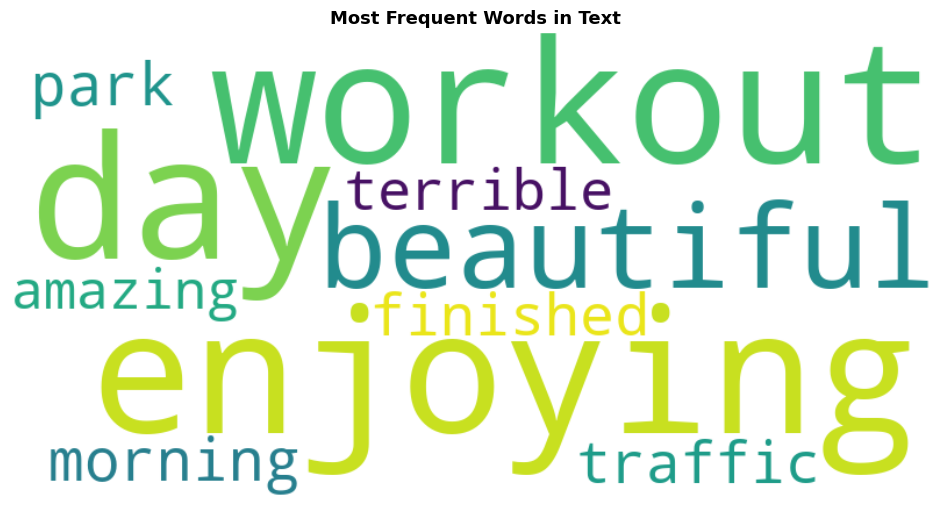

In [73]:
pyt.figure(figsize=(12,12))
pyt.title("Most Frequent Words in Text",fontdict={"fontsize":13,"fontweight":"bold"},color="black")
word=WordCloud(width=800,height=400,background_color="white").generate(text)
pyt.imshow(word,interpolation="bilinear")
pyt.axis("off")
pyt.show()

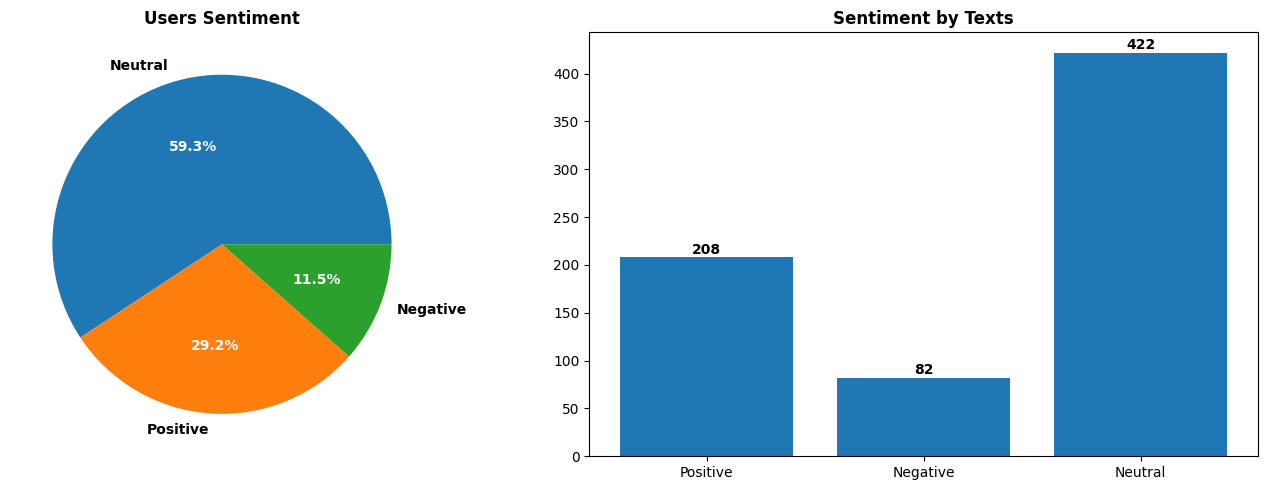

In [76]:
fig,(ax1,ax2) = pyt.subplots(1,2,figsize=(14,5))
ax1.set_title("Users Sentiment",fontdict={"fontsize":12,"fontweight":"bold"})
wedges,textprops,autotexts=ax1.pie(list(df["Sentiment"].value_counts()),labels=list(df["Sentiment"].value_counts().keys()),autopct="%0.1f%%")
for text in textprops:
    text.set_color("black")
    text.set_fontweight("bold")
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontweight("bold")
ax2.set_title("Sentiment by Texts",fontdict={"fontweight":"bold","fontsize":12})
ax2.bar(sentence_type.keys(),sentence_type.values())
for bar in ax2.patches:
    height=bar.get_height()
    pyt.text(bar.get_x()+bar.get_width()/2,height+0.5,str(height),ha="center",va="bottom",fontdict={"fontweight":"bold"})
pyt.tight_layout()
pyt.show()

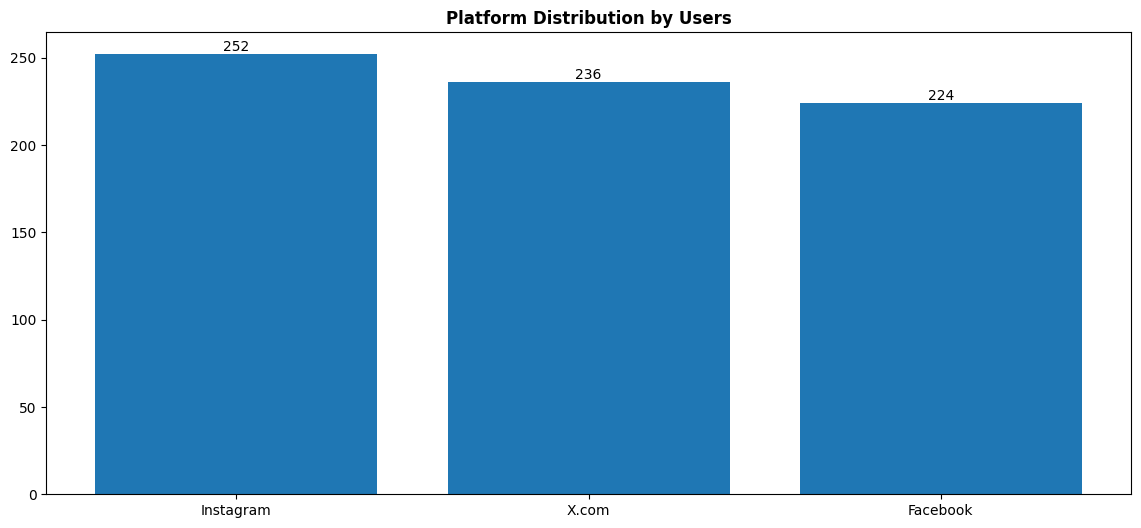

In [78]:
pyt.figure(figsize=(14,6))
pyt.title("Platform Distribution by Users",fontdict={"fontweight":"bold","fontsize":12})
ax=pyt.bar(list(df["Platform"].value_counts().keys()),list(df["Platform"].value_counts()))
for bar in ax.patches:
    height=bar.get_height()
    pyt.text(bar.get_x()+bar.get_width()/2,height,str(height),ha="center",va="bottom")

pyt.show()

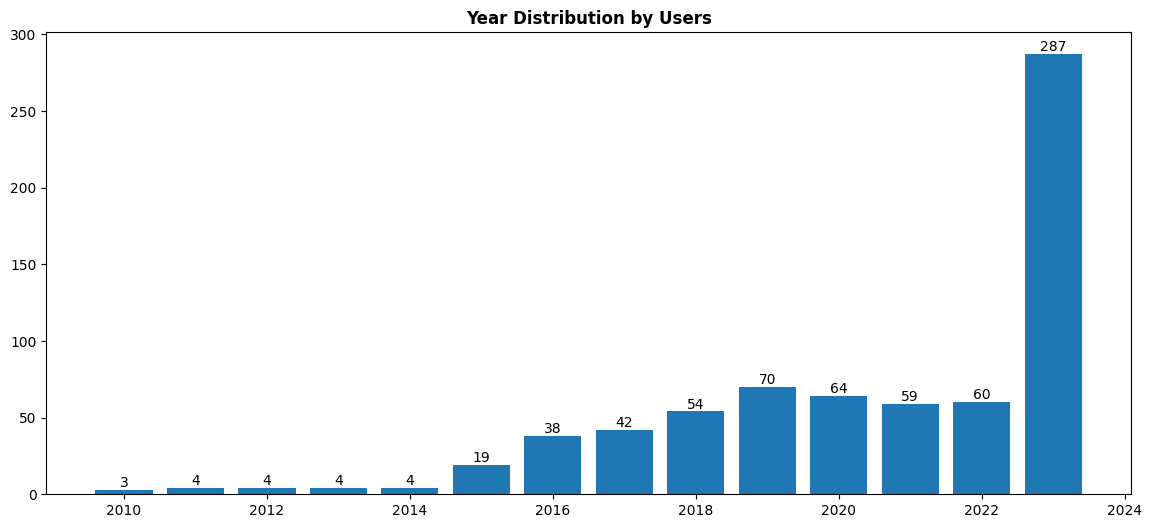

In [79]:
pyt.figure(figsize=(14,6))
pyt.title("Year Distribution by Users",fontdict={"fontweight":"bold","fontsize":12})
ax=pyt.bar(list(df["Year"].value_counts().keys()),list(df["Year"].value_counts()))
for bar in ax.patches:
    height=bar.get_height()
    pyt.text(bar.get_x()+bar.get_width()/2,height,str(height),ha="center",va="bottom")

pyt.show()

In [85]:
s=SentimentIntensityAnalyzer()

In [86]:
positive_words=[]
negative_words=[]

def frequent_count_positive_and_negative_words(data):
    global positive_words
    global negative_words
    senti=SentimentIntensityAnalyzer()    
    for i,val in enumerate(data):
        word=senti.polarity_scores(val)
        if word["pos"]>word["neg"]:
            positive_words.append(val)
        elif word["neg"]>word["pos"]:
            negative_words.append(val)

# Calling Function
result=[frequent_count_positive_and_negative_words(word) for word in cleaned_texts]

In [87]:
print("Total Positive Words:",len(positive_words))

Total Positive Words: 1027


In [88]:
print("Total Negative Words:",len(negative_words))

Total Negative Words: 430


In [89]:
def text_visualize(text,title,color):
    pyt.figure(figsize=(12,6))
    positive_text=" ".join(text)
    pyt.title(title,fontdict={"fontweight":"bold","fontsize":12},color=color)
    word_cloud=WordCloud(width=800,height=400,background_color="black").generate(positive_text)
    pyt.imshow(word_cloud,interpolation="bilinear")
    pyt.axis("off")
    
    pyt.tight_layout()
    pyt.show()


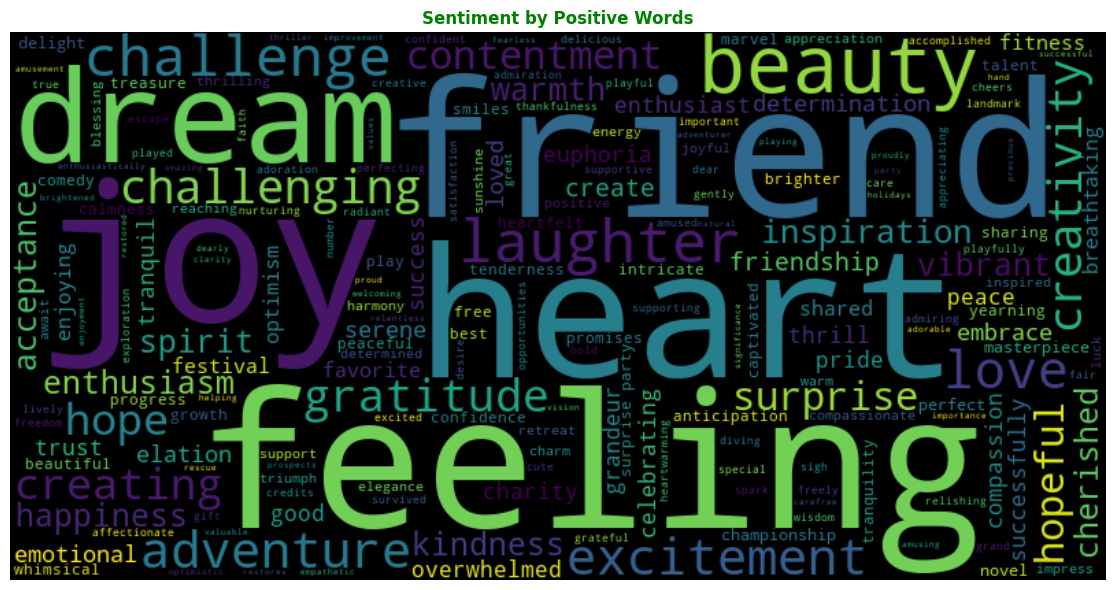

In [95]:
text_visualize(positive_words,"Sentiment by Positive Words","green")

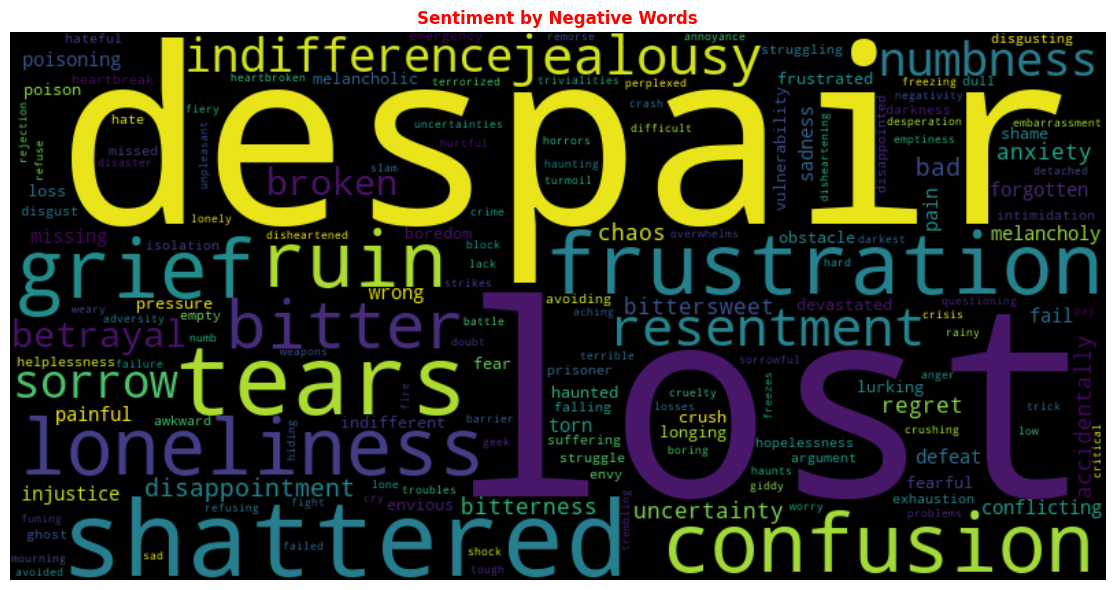

In [356]:
text_visualize(negative_words,"Sentiment by Negative Words","red")

# End